<a href="https://www.kaggle.com/taha07/jobs-of-data-analyst?scriptVersionId=89385747" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---

<h1 style="text-align: center;font-size: 40px;">Jobs of Data Analyst </h1>

---

<center><img src="https://images.unsplash.com/photo-1551288049-bebda4e38f71?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=750&q=80"></center>

---

> Data analysis is a process of inspecting, cleansing, transforming and modeling data with the goal of discovering useful information, informing conclusions and supporting decision-making. Data analysis has multiple facets and approaches, encompassing diverse techniques under a variety of names, and is used in different business, science, and social science domains. In today's business world, data analysis plays a role in making decisions more scientific and helping businesses operate more effectively
>> >Here i'm going to analysis & visualize different Kind of Jobs of Data Analyst,according to different Company and their Salary and more.......

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import missingno as msno
import plotly.express as px
from scipy import stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/data-analyst-jobs/DataAnalyst.csv


In [2]:
df = pd.read_csv("/kaggle/input/data-analyst-jobs/DataAnalyst.csv")
df.head()

Unnamed: 0                                          Job Title  \
0           0  Data Analyst, Center on Immigration and Justic...   
1           1                               Quality Data Analyst   
2           2  Senior Data Analyst, Insights & Analytics Team...   
3           3                                       Data Analyst   
4           4                             Reporting Data Analyst   

              Salary Estimate  \
0  $37K-$66K (Glassdoor est.)   
1  $37K-$66K (Glassdoor est.)   
2  $37K-$66K (Glassdoor est.)   
3  $37K-$66K (Glassdoor est.)   
4  $37K-$66K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Are you eager to roll up your sleeves and harn...     3.2   
1  Overview\n\nProvides analytical and technical ...     3.8   
2  We’re looking for a Senior Data Analyst who ha...     3.4   
3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
4  ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...     3.9   

                              Company Name      Location  Headquarters  \
0           Vera Institute of Justice\n3.2  New York, NY  New York, NY   
1  Visiting Nurse Service of New York\n3.8  New York, NY  New York, NY   
2                         Squarespace\n3.4  New York, NY  New York, NY   
3                            Celerity\n4.1  New York, NY    McLean, VA   
4                             FanDuel\n3.9  New York, NY  New York, NY   

                     Size  Founded               Type of ownership  \
0    201 to 500 employees     1961          Nonprofit Organization   
1        10000+ employees     1893          Nonprofit Organization   
2  1001 to 5000 employees     2003               Company - Private   
3    201 to 500 employees     2002  Subsidiary or Business Segment   
4   501 to 1000 employees     2009               Company - Private   

                           Industry                            Sector  \
0                 Social Assistance                        Non-Profit   
1  Health Care Services & Hospitals                       Health Care   
2                          Internet            Information Technology   
3                       IT Services            Information Technology   
4               Sports & Recreation  Arts, Entertainment & Recreation   

                      Revenue Competitors Easy Apply  
0  $100 to $500 million (USD)          -1       True  
1      $2 to $5 billion (USD)          -1         -1  
2    Unknown / Non-Applicable     GoDaddy         -1  
3   $50 to $100 million (USD)          -1         -1  
4  $100 to $500 million (USD)  DraftKings       True

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [4]:
df.describe()

Unnamed: 0       Rating      Founded
count   2253.0000  2253.000000  2253.000000
mean    1126.0000     3.160630  1398.522858
std      650.5294     1.665228   901.929251
min        0.0000    -1.000000    -1.000000
25%      563.0000     3.100000    -1.000000
50%     1126.0000     3.600000  1979.000000
75%     1689.0000     4.000000  2002.000000
max     2252.0000     5.000000  2019.000000

> Let's find out is there any null values or not

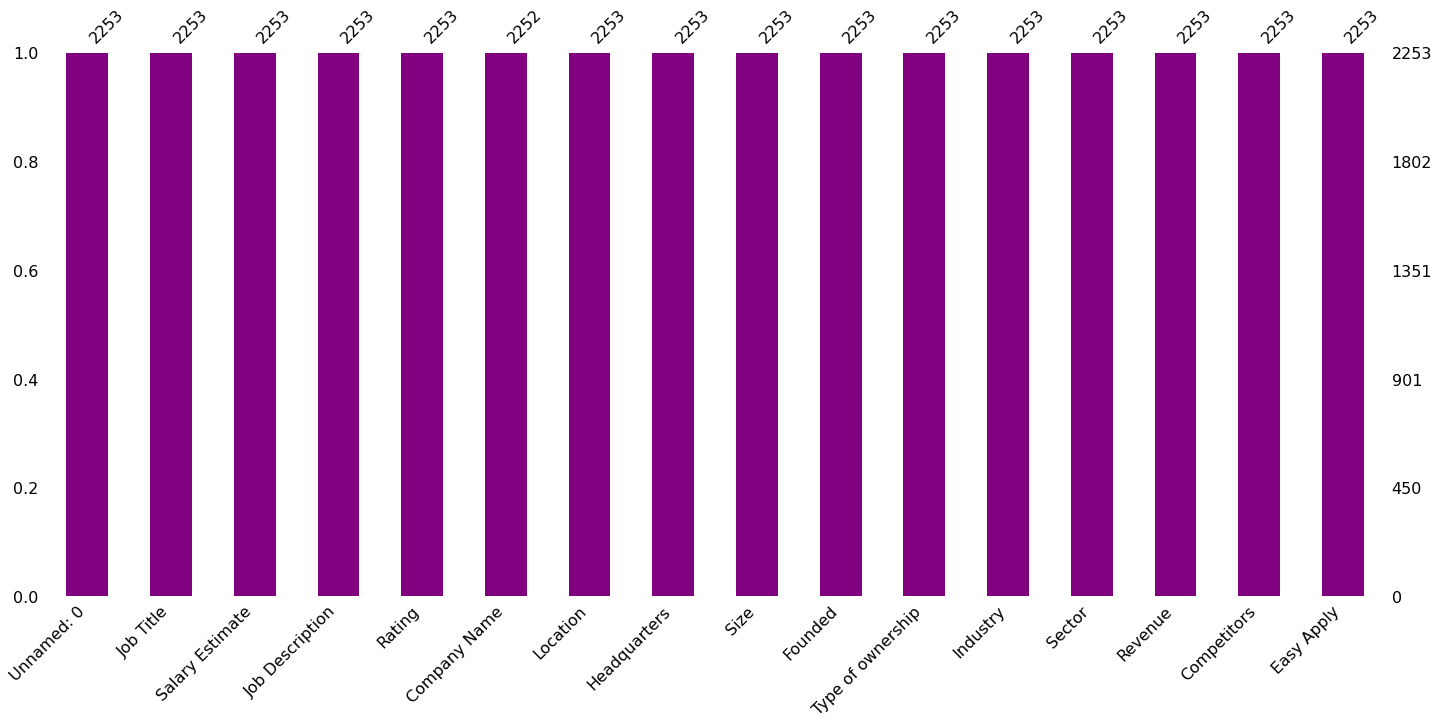

In [5]:
n = msno.bar(df,color='purple')

><h3>Data Preprocessing</h3>

In [6]:
#Dropping Unnecessary Columns
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [7]:
df['Salary Estimate'].replace(['-1'],[np.nan],inplace=True)
df['Salary Estimate'].fillna('$36K-$56K (Glassdoor est.)',inplace=True)
df.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

> Let's split  Salary Estimate into lower & upper bound .

In [8]:

for i in range(df.shape[0]):
    salary_estimate = df.loc[i,"Salary Estimate"]
    salary_estimate = salary_estimate.replace("$", "")
   
    lower, upper = salary_estimate.split("-")
    lower = lower.replace("K", "")
    upper, _ = upper.split("(")
    upper=upper.replace("K", "")
    upper = upper.strip()
       
    
        
    lower = int(lower)
    upper = int(upper)
    df.loc[i,"salary_estimate_lower_bound"] = lower
    df.loc[i,"salary_estimate_upper_bound"] = upper
  



In [9]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

> Now let's split the "\n & rating" from company Name

In [10]:
for i in range(df.shape[0]):
    name = df.loc[i,"Company Name"]
    if "\n" in name:
        name,_ = name.split("\n")
    df.loc[i,"Company Name"] = name

> Now let's splits the Size into lower & upper size

In [11]:
for i in range(df.shape[0]):
    size = df.loc[i,"Size"]
    if "to" in  size:
        lower,upper = size.split("to")
        lower = lower.strip() 
        _, upper, _ = upper.split(" ")
        upper = upper.strip()
        lower = int(lower)
        upper = int(upper)
    elif "+" in size:
        lower,_ = size.split("+")
        lower = int(lower)
        upper = np.inf
    else:
        lower = np.nan
        upper = np.nan
    df.loc[i,"Minimum Size"] = lower
    df.loc[i,"Maximum Size"] = upper
    


In [12]:
#Dropping the Unnecessary columns
df.drop(['Salary Estimate','Size'],axis=1,inplace=True)

In [13]:
df["Minimum Size"].fillna(0,inplace=True)
df["Maximum Size"].fillna(0,inplace=True)
df.isnull().sum()

index                          0
Job Title                      0
Job Description                0
Rating                         0
Company Name                   0
Location                       0
Headquarters                   0
Founded                        0
Type of ownership              0
Industry                       0
Sector                         0
Revenue                        0
Competitors                    0
Easy Apply                     0
salary_estimate_lower_bound    0
salary_estimate_upper_bound    0
Minimum Size                   0
Maximum Size                   0
dtype: int64

>**Now let's visualize our Data**

> Let's see top 20  Company with highest number of Jobs 

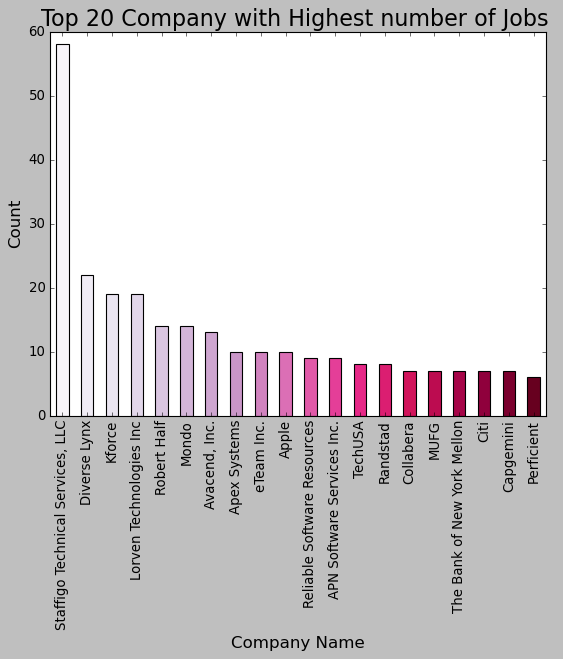

In [15]:
plt.rcParams["figure.figsize"] = (12,9)
plt.style.use("classic")
color = plt.cm.PuRd(np.linspace(0,1,20))
df["Company Name"].value_counts().sort_values(ascending=False).head(20).plot.bar(color=color)
plt.title("Top 20 Company with Highest number of Jobs ",fontsize=20)
plt.xlabel("Company Name",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

> Number of Jobs according to Different Company

In [16]:
com =df['Company Name'].value_counts()
company = pd.DataFrame({'Company': com.index,'Number of Jobs':com.values})
company.head()

Company  Number of Jobs
0  Staffigo Technical Services, LLC              58
1                      Diverse Lynx              22
2                            Kforce              19
3           Lorven Technologies Inc              19
4                       Robert Half              14

In [24]:
pio.renderers.default = 'svg'
def plot_treemap(dataframe,variable,value):
    fig = px.treemap(dataframe.sort_values(by=value,ascending=False)[:100].reset_index(drop=True),
                     path=[variable],values=value,title=('Company with Number of Jobs'),color=variable,
                     color_discrete_sequence = px.colors.qualitative.Set1)
    fig.data[0].textinfo = 'label+text+value'
    
    fig.show("notebook")
    
plot_treemap(company,'Company','Number of Jobs')

>  Let's see most Popular Jobs of Data Analyst 

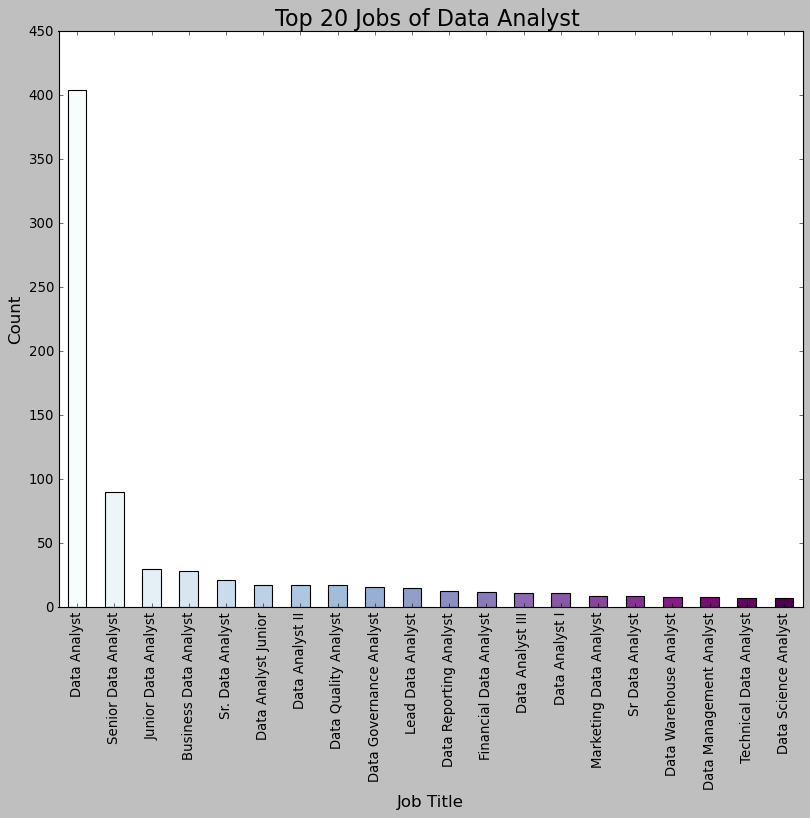

In [25]:
plt.rcParams['figure.figsize'] = (12,9)
color = plt.cm.BuPu(np.linspace(0,1,20))
df["Job Title"].value_counts().sort_values(ascending=False).head(20).plot.bar(color=color)
plt.title("Top 20 Jobs of Data Analyst ",fontsize=20)
plt.xlabel("Job Title",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

> Top 20 locations for Data Analysts Jobs

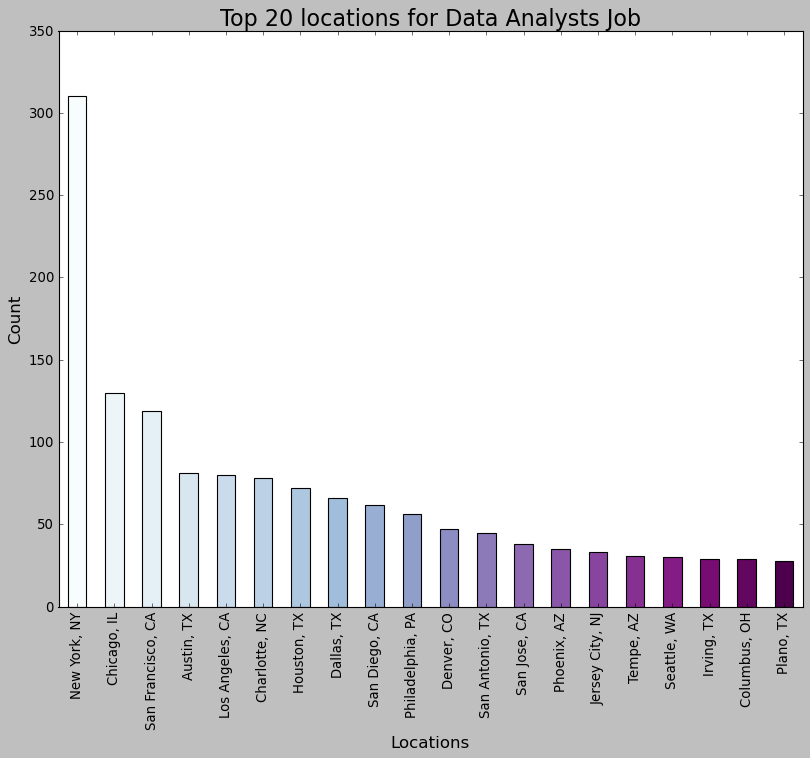

In [26]:
plt.rcParams['figure.figsize'] = (12,9)
color = plt.cm.BuPu(np.linspace(0,1,20))
df["Location"].value_counts().sort_values(ascending=False).head(20).plot.bar(color=color)
plt.title("Top 20 locations for Data Analysts Job",fontsize=20)
plt.xlabel("Locations",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

> Top 20 **Head Quarters** of Data Analyst Job Holder Company

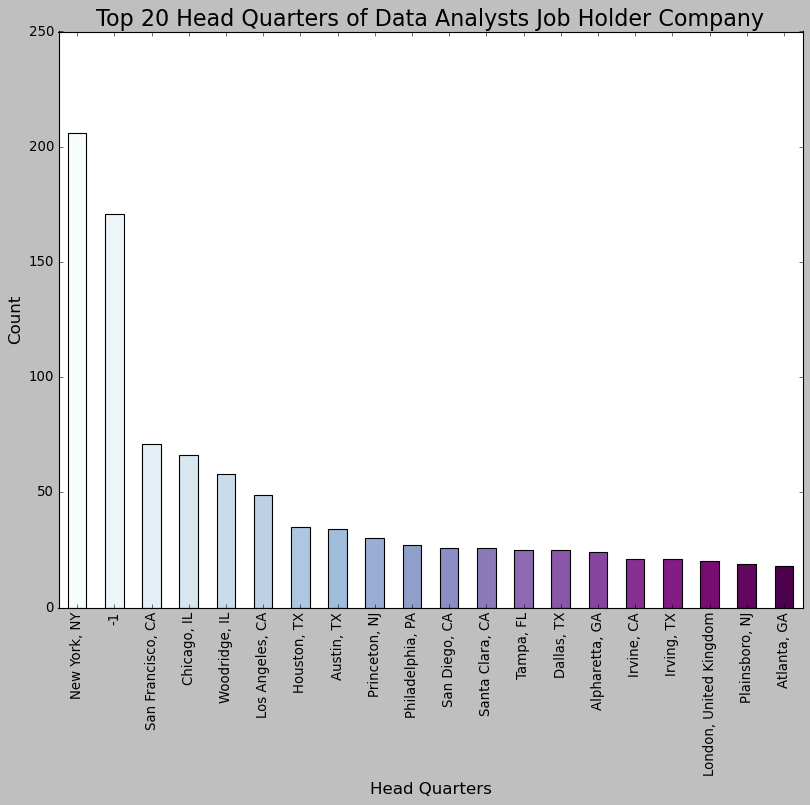

In [27]:
plt.rcParams['figure.figsize'] = (12,9)
color = plt.cm.BuPu(np.linspace(0,1,20))
df["Headquarters"].value_counts().sort_values(ascending=False).head(20).plot.bar(color=color)
plt.title("Top 20 Head Quarters of Data Analysts Job Holder Company",fontsize=20)
plt.xlabel("Head Quarters",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

> Let's find out Number of **Head Quarters** according to different **Cities**

In [28]:
hq =df['Headquarters'].value_counts()
loc = pd.DataFrame({'Location': hq.index,'Number of HQ':hq.values})
loc.drop(index=1,inplace=True)

In [29]:
loc.head()

Location  Number of HQ
0       New York, NY           206
2  San Francisco, CA            71
3        Chicago, IL            66
4      Woodridge, IL            58
5    Los Angeles, CA            49

In [31]:
def plot_treemap(dataframe,variable,value):
    fig = px.treemap(dataframe.sort_values(by=value,ascending=False)[:100].reset_index(drop=True),
                     path=[variable],values=value,title=('Number of Head Quarters According to Cities'),color=variable,
                     color_discrete_sequence = px.colors.qualitative.Set1)
    fig.data[0].textinfo = 'label+text+value'
    
    fig.show("notebook")
    
plot_treemap(loc,'Location','Number of HQ')

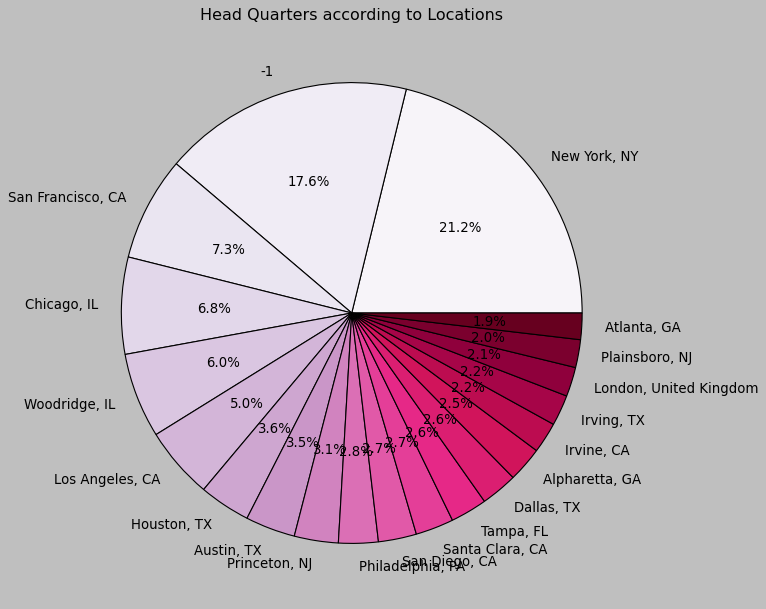

In [32]:
color = plt.cm.PuRd(np.linspace(0,1,20))
df["Headquarters"].value_counts().sort_values(ascending=False).head(20).plot.pie(y="Headquarters",colors=color,autopct="%0.1f%%")
plt.title("Head Quarters according to Locations")
plt.axis("off")
plt.show()

> So almost 21.2% Head Quarters are in New York  & "-1" is the name that isn't mentioned in the Dataset

> Highest number of Company Founded in a Year

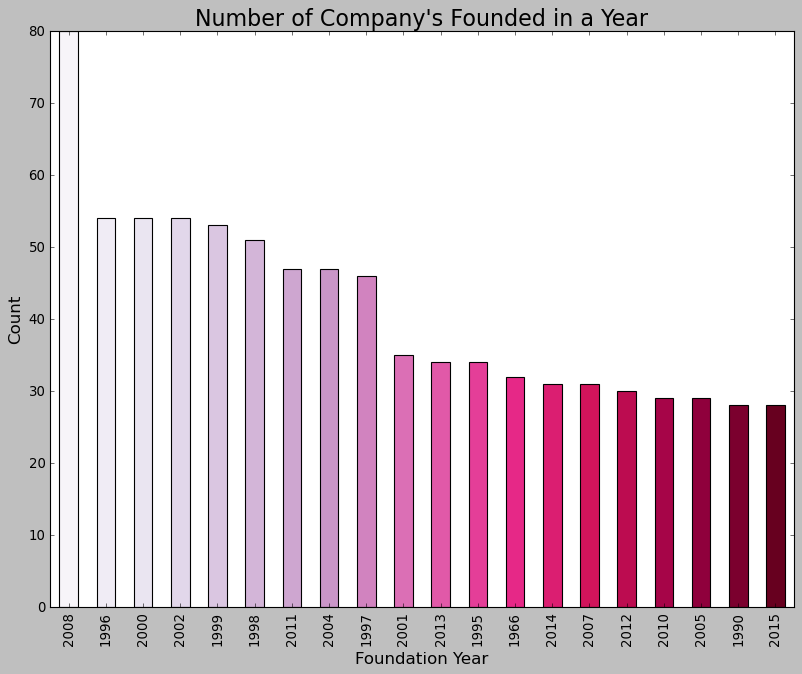

In [34]:
plt.rcParams['figure.figsize'] = (12,9)
color = plt.cm.PuRd(np.linspace(0,1,20))
df["Founded"].value_counts().sort_values(ascending=False)[1:21].plot.bar(color=color)
plt.title("Number of Company's Founded in a Year",fontsize=20)
plt.xlabel("Foundation Year",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

> So 2008 is the Year when almost 80 Company's with Data Analysts job has been Founded and in the Year 1996 almost 55 company's with data Analysts job has been Founded

> Types of Ownership

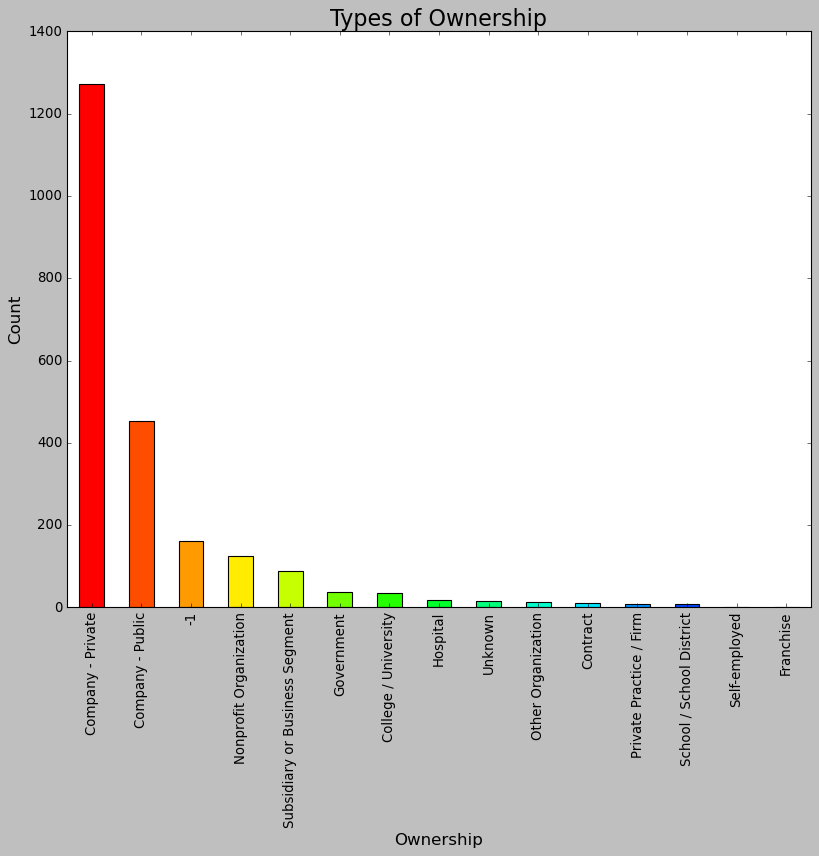

In [35]:
plt.rcParams['figure.figsize'] = (12,9)
color = plt.cm.hsv(np.linspace(0,1,20))
df["Type of ownership"].value_counts().sort_values(ascending=False).plot.bar(color=color)
plt.title("Types of Ownership",fontsize=20)
plt.xlabel("Ownership",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

>A higher number of  Company's are Private almost 1300 & just  500 company's are Public 🏦

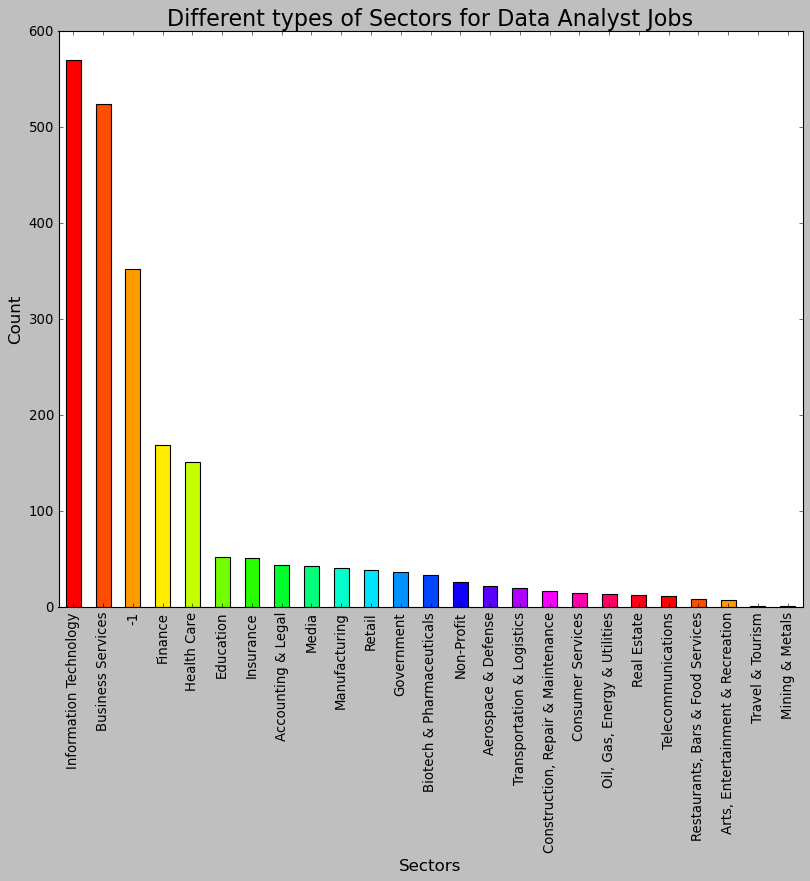

In [36]:
plt.rcParams['figure.figsize'] = (12,9)
color = plt.cm.hsv(np.linspace(0,1,20))
df["Sector"].value_counts().sort_values(ascending=False).plot.bar(color=color)
plt.title("Different types of Sectors for Data Analyst Jobs",fontsize=20)
plt.xlabel("Sectors",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

> So most of the Data Analyst jobs are belongs to the sector of Information Technology

> Top 30 Data Analyst job according to Salary

In [37]:
df[['Job Title','salary_estimate_upper_bound']].nlargest(10,"salary_estimate_upper_bound",keep='first')

Job Title  salary_estimate_upper_bound
1468                           Data Analyst                        190.0
1469                 Senior HR Data Analyst                        190.0
1470   Sr. Data Analyst - Growth & Adoption                        190.0
1471                           Data Analyst                        190.0
1472         Data Analyst, Product Insights                        190.0
1473                    Senior Data Analyst                        190.0
1474  Data and User Acceptance Test Analyst                        190.0
1475                           Data Analyst                        190.0
1476                           Data Analyst                        190.0
1477                           Data Analyst                        190.0

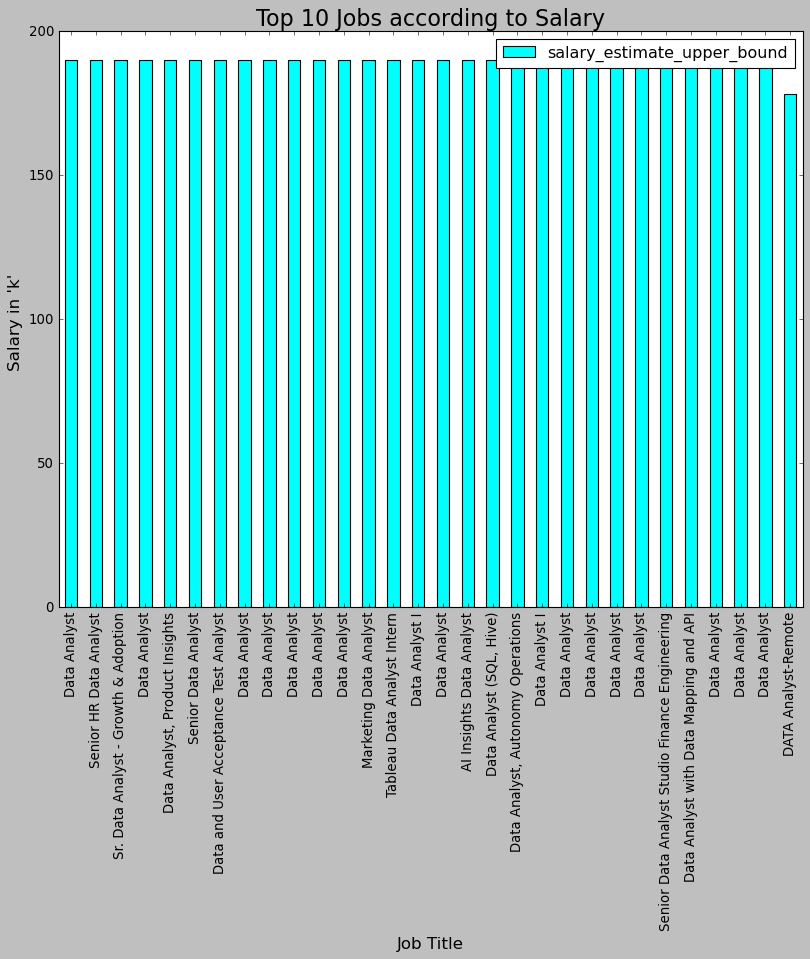

In [38]:
plt.rcParams['figure.figsize'] = (12,9)
df[['Job Title','salary_estimate_upper_bound']].nlargest(30,"salary_estimate_upper_bound").plot.bar(x="Job Title",y="salary_estimate_upper_bound",color='cyan')
plt.title("Top 10 Jobs according to Salary",fontsize=20)
plt.xlabel("Job Title",fontsize=15)
plt.ylabel("Salary in 'k' ",fontsize=15)
plt.show()

>Let's see Distribution of Highest & Lowest Salary and Minimum & Maximum number of employes

In [52]:
df[df['Maximum Size'] != np.inf]['Maximum Size'].value_counts()

200.0      421
5000.0     348
50.0       347
500.0      249
1000.0     211
0.0        204
10000.0     97
Name: Maximum Size, dtype: int64

<Figure size 640x480 with 0 Axes>

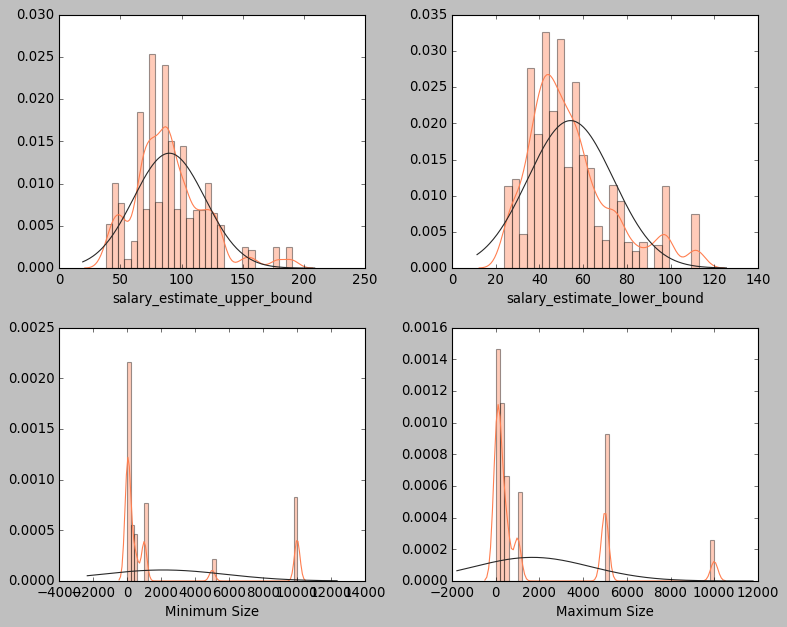

In [54]:
plt.figure(figsize=(8,6))
fig,ax = plt.subplots(2,2,figsize=(10,8))
sns.distplot(df['salary_estimate_upper_bound'],fit = stats.norm,color='coral',ax=ax[0][0])
sns.distplot(df['salary_estimate_lower_bound'],fit = stats.norm,color='coral',ax=ax[0][1])
sns.distplot(df['Minimum Size'],fit = stats.norm,color='coral',ax=ax[1][0])
sns.distplot(df[df['Maximum Size'] != np.inf]['Maximum Size'],fit = stats.norm,color='coral',ax=ax[1][1])
plt.tight_layout()
plt.show();

In [55]:
df["Maximum Size"].replace(np.inf,0,inplace=True)
df[['Company Name','Maximum Size']].nlargest(10,'Maximum Size')

Company Name  Maximum Size
8                                  DMGT       10000.0
197  Columbia University Medical Center       10000.0
244              NYC Health + Hospitals       10000.0
297               Hikma Pharmaceuticals       10000.0
310  Columbia University Medical Center       10000.0
319                    YAI/NIPD Network       10000.0
441                         F5 Networks       10000.0
493                          Guidehouse       10000.0
496                          Guidehouse       10000.0
557          Warner Bros. Entertainment       10000.0

> Company's with Highest Number of Employees,all of these Company's has employees higher than 10000

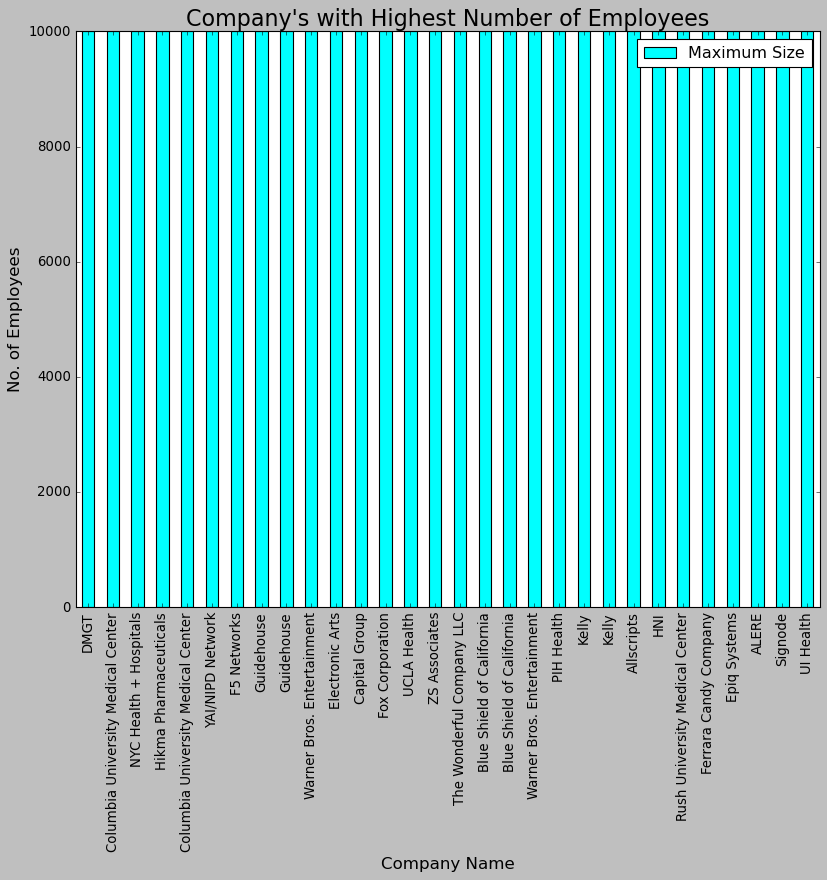

In [56]:
plt.rcParams['figure.figsize'] = (12,9)
df[['Company Name','Maximum Size']].nlargest(30,'Maximum Size').plot.bar(x="Company Name",y="Maximum Size",color='cyan')
plt.title("Company's with Highest Number of Employees",fontsize=20)
plt.xlabel("Company Name",fontsize=15)
plt.ylabel("No. of Employees",fontsize=15)
plt.show()

> Top 30 Company with Highest Number of Rating

In [57]:
dfrating = df.groupby(['Company Name'])[['Company Name','Rating']]
dfrating.head().nlargest(10,'Rating').style.background_gradient(cmap='Reds')

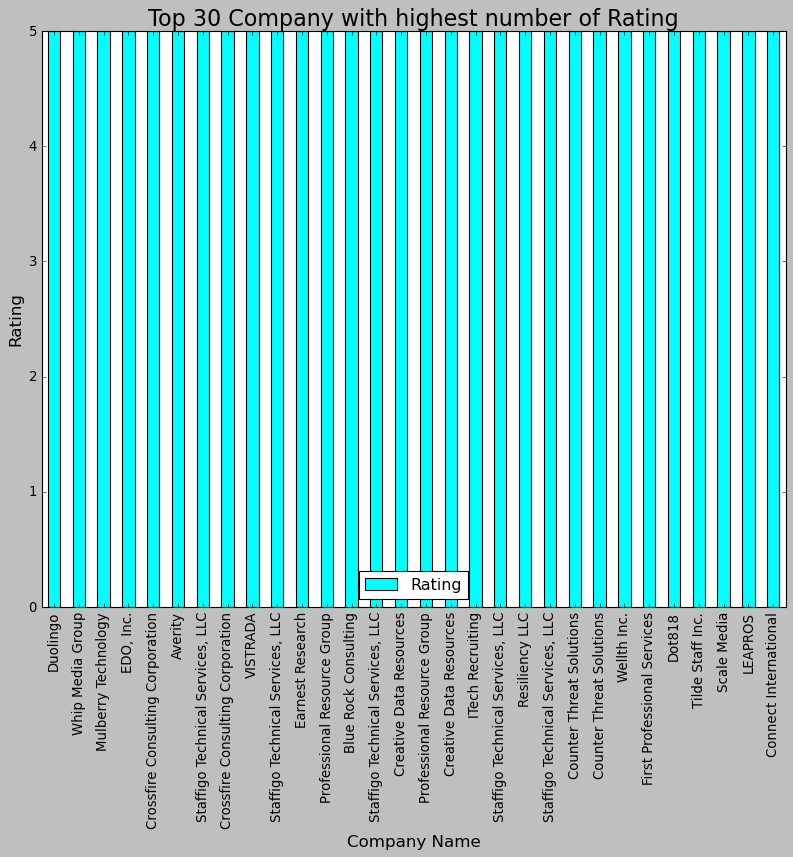

In [58]:
plt.rcParams['figure.figsize']=(12,9)
color = plt.cm.BuPu(np.linspace(0,1,20))
dfrating.head().nlargest(30,'Rating').plot.bar(x='Company Name',y='Rating',color='cyan')
plt.title("Top 30 Company with highest number of Rating",fontsize=20)
plt.xlabel("Company Name",fontsize=15)
plt.ylabel("Rating",fontsize=15)
plt.show()

> Let's see Number of Companies with specific Rating

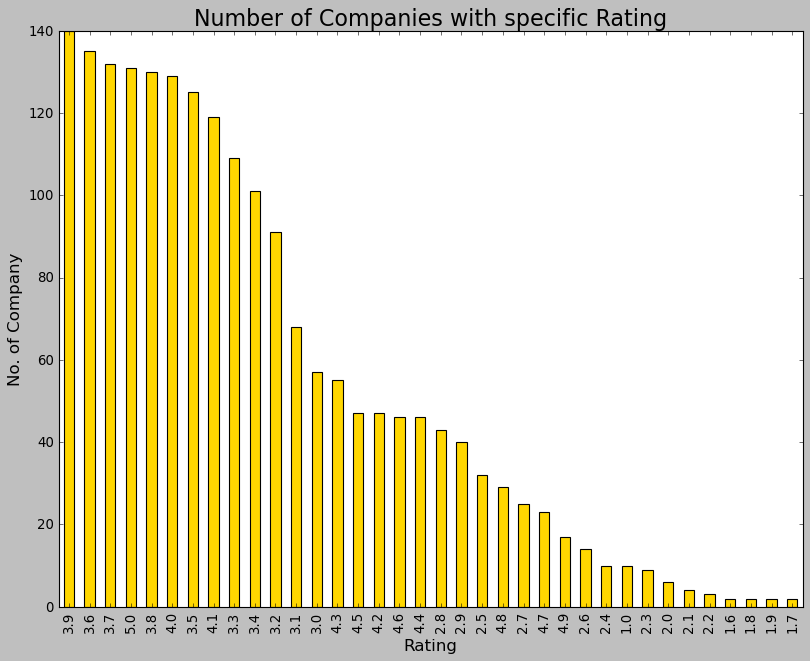

In [59]:
plt.rcParams['figure.figsize']=(12,9)
color = plt.cm.BuPu(np.linspace(0,1,20))
df['Rating'] = df['Rating'].replace(-1,np.NaN)
df['Rating'].value_counts().plot.bar(x='Rating',y='No. of Companies',color='gold')
plt.title("Number of Companies with specific Rating",fontsize=20)
plt.xlabel("Rating",fontsize=15)
plt.ylabel("No. of Company",fontsize=15)
plt.show()

>Almost 140 companies have 3.9 rating and 131 companies have highest rating which is 5

> Let's make Word Cloud
>>> 1. Job Title 

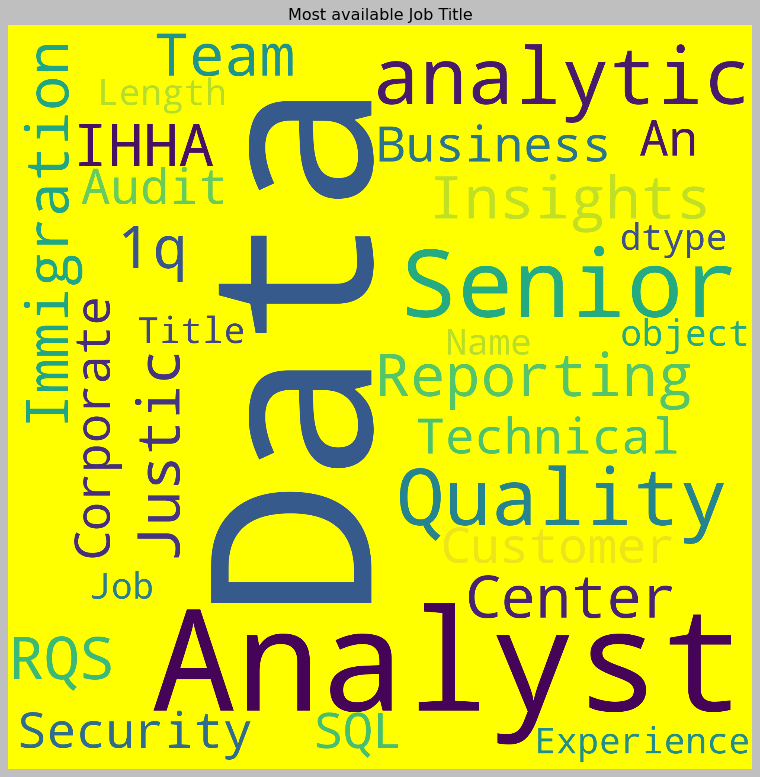

In [60]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'yellow',
                      height =2000,
                      width = 2000
                     ).generate(str(df["Job Title"]))
plt.rcParams['figure.figsize'] = (12,12)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Most available Job Title")
plt.show()

> 2.Company's Name

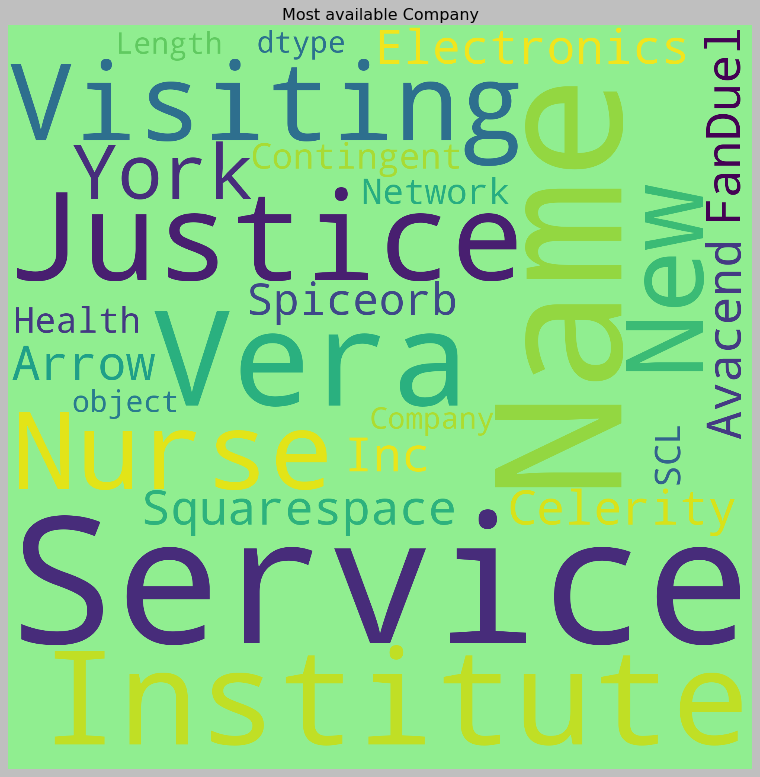

In [61]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'lightgreen',
                      height =2000,
                      width = 2000
                     ).generate(str(df["Company Name"]))
plt.rcParams['figure.figsize'] = (12,12)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Most available Company")
plt.show()

> 3. Head Quarters

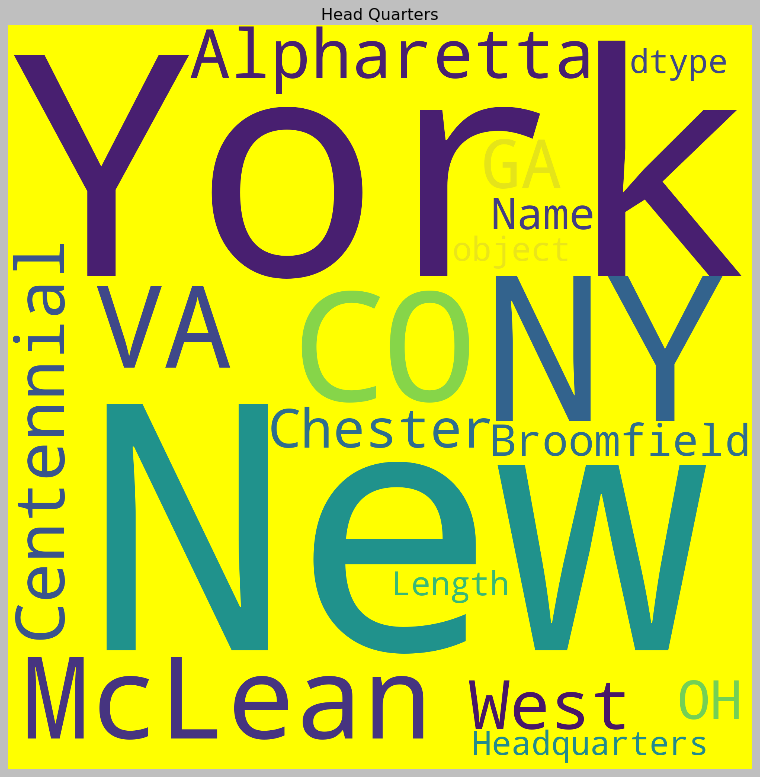

In [62]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'yellow',
                      height =2000,
                      width = 2000
                     ).generate(str(df["Headquarters"]))
plt.rcParams['figure.figsize'] = (12,12)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Head Quarters")
plt.show()